To be able to unpickle the objects custom functions need to be defined already. This is a problem which we have to solve when a workflow is saved (maybe we save a python files containing all custom functions with the workflow?). Anyway unpickling is easy and we can see that the workflow is retrieved and still works:

In [1]:
import pickle

from skimage.io import imread, imshow
from skimage.filters import threshold_otsu, gaussian
from skimage.measure import label

# define segmentation
def threshold(image):
    return image > threshold_otsu(image)

w_pickle = pickle.load(open("workflow.pickle", "rb"))
w_pickle

In [2]:
w_pickle._tasks

{'denoised': (<function skimage._shared.filters.gaussian(image, sigma=1, output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0, *, channel_axis=None)>,
  'input',
  2,
  None,
  'nearest',
  0,
  None,
  False,
  4.0),
 'binarized': (<function __main__.threshold(image)>, 'denoised'),
 'labeled': (<function skimage.measure._label.label(label_image, background=None, return_num=False, connectivity=None)>,
  'binarized',
  None,
  False),
 'input': array([[ 40,  32,  24, ..., 216, 200, 200],
        [ 56,  40,  24, ..., 232, 216, 216],
        [ 64,  48,  24, ..., 240, 232, 232],
        ...,
        [ 72,  80,  80, ...,  48,  48,  48],
        [ 80,  80,  80, ...,  48,  48,  48],
        [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)}

C:\Users\ryans\anaconda3\envs\np_workflows_v1\lib\site-packages\dask\core.py:119: FutureWarning: Providing the `multichannel` argument positionally to gaussian is deprecated. Use the `channel_axis` kwarg instead.
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\ryans\anaconda3\envs\np_workflows_v1\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


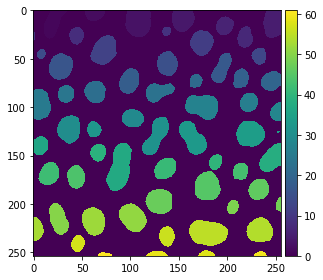

In [3]:
result_pickle = w_pickle.get("labeled")

imshow(result_pickle)

The json file can also be read but we can see that the object is only saved as a library and furthermore the functions seem to be converted to weird `__wrapped__` objects. Probably this format won't be the way to go:

In [4]:
import json

w_json = json.load(open('workflow.json', 'rb'))
print(w_json)

{'_tasks': {'denoised': [{'__wrapped__': {}}, 'input', 2, None, 'nearest', 0, None, False, 4.0], 'binarized': [{}, 'denoised'], 'labeled': [{'__wrapped__': {}}, 'binarized', None, False], 'input': [[40, 32, 24, 24, 16, 24, 24, 32, 32, 32, 24, 24, 24, 24, 24, 32, 40, 80, 112, 152, 184, 208, 232, 232, 224, 216, 208, 208, 208, 208, 200, 200, 200, 184, 160, 128, 88, 72, 48, 40, 24, 24, 24, 32, 32, 40, 40, 48, 48, 48, 48, 72, 96, 136, 176, 184, 192, 184, 168, 176, 184, 192, 200, 200, 192, 184, 176, 184, 184, 192, 200, 192, 176, 144, 112, 88, 56, 40, 24, 24, 24, 32, 32, 32, 32, 40, 40, 48, 48, 48, 48, 48, 40, 40, 40, 56, 72, 120, 160, 192, 216, 232, 240, 232, 224, 224, 224, 232, 232, 240, 240, 240, 240, 240, 232, 232, 224, 216, 208, 184, 152, 104, 56, 48, 32, 40, 48, 64, 72, 64, 56, 56, 56, 56, 48, 48, 48, 48, 40, 40, 32, 32, 32, 56, 72, 120, 160, 192, 216, 232, 248, 240, 232, 232, 232, 232, 232, 232, 224, 216, 200, 192, 184, 168, 144, 112, 80, 56, 32, 40, 40, 48, 56, 56, 56, 56, 48, 48, 48,

The deserialising of the yaml file is very straight forward although we do need to use unsafe loading in order to just deselrialise any object. This porses a security risk which we need to keep in mind for later:

In [5]:
import yaml

with open("workflow.yaml", "rb") as stream:
    w_yaml=yaml.unsafe_load(stream)

print(w_yaml)

Workflow:
binarized <- (<function threshold at 0x000001C76526BEB0>, 'denoised')
denoised <- (<function gaussian at 0x000001C77FA38820>, 'input', 2, None, 'nearest', 0, None, False, 4.0)
input <- [[ 40  32  24 ... 216 200 200]
 [ 56  40  24 ... 232 216 216]
 [ 64  48  24 ... 240 232 232]
 ...
 [ 72  80  80 ...  48  48  48]
 [ 80  80  80 ...  48  48  48]
 [ 96  88  80 ...  48  48  48]]
labeled <- (<function label at 0x000001C70068E3B0>, 'binarized', None, False)



As with the pickle object custom functions and libraries need to be defined and imported to be able to run the workflow. Since we have already done that in the steps above we can just take a look at the result:

C:\Users\ryans\anaconda3\envs\np_workflows_v1\lib\site-packages\dask\core.py:119: FutureWarning: Providing the `multichannel` argument positionally to gaussian is deprecated. Use the `channel_axis` kwarg instead.
  return func(*(_execute_task(a, cache) for a in args))


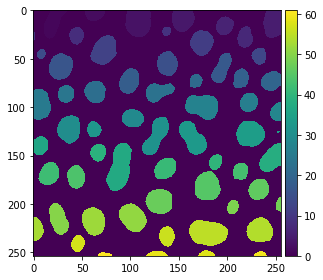

In [6]:
result_yaml = w_yaml.get("labeled")

imshow(result_yaml)

In [11]:
print(w_yaml._tasks['binarized'])

(<function threshold at 0x000001C76526BEB0>, 'denoised')


In [23]:
import magicgui
factory = magicgui.magic_factory(w_yaml._tasks['denoised'][0])

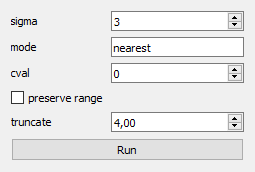

In [29]:
factory(sigma = {'value':2})

In [30]:
w_yaml._tasks['denoised']

(<function skimage._shared.filters.gaussian(image, sigma=1, output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0, *, channel_axis=None)>,
 'input',
 2,
 None,
 'nearest',
 0,
 None,
 False,
 4.0)

In [ ]:
from napari_tools_menu import make_gui
import napari

viewer = napari.Viewer()
viewer.window.add_dock_widget(make_gui(w_yaml._tasks['denoised'][0],viewer))

('input', 2, None, 'nearest', 0, None, False, 4.0)